# 모듈 import

In [19]:
import os
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_breast_cancer, load_digits, load_wine

warnings.filterwarnings("ignore")

In [2]:
os.chdir('..')
# my module
from modules.sklearn_practice import TrainTestSklClassifier

# 데이터 불러오기
---
## breast_cancer

In [3]:
# Data
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
print('Target Names 출력 \n', data.target_names)
print('-' *50)
print('Data Describe \n', data.DESCR)

Target Names 출력 
 ['malignant' 'benign']
--------------------------------------------------
Data Describe 
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

# 간단한 시각화

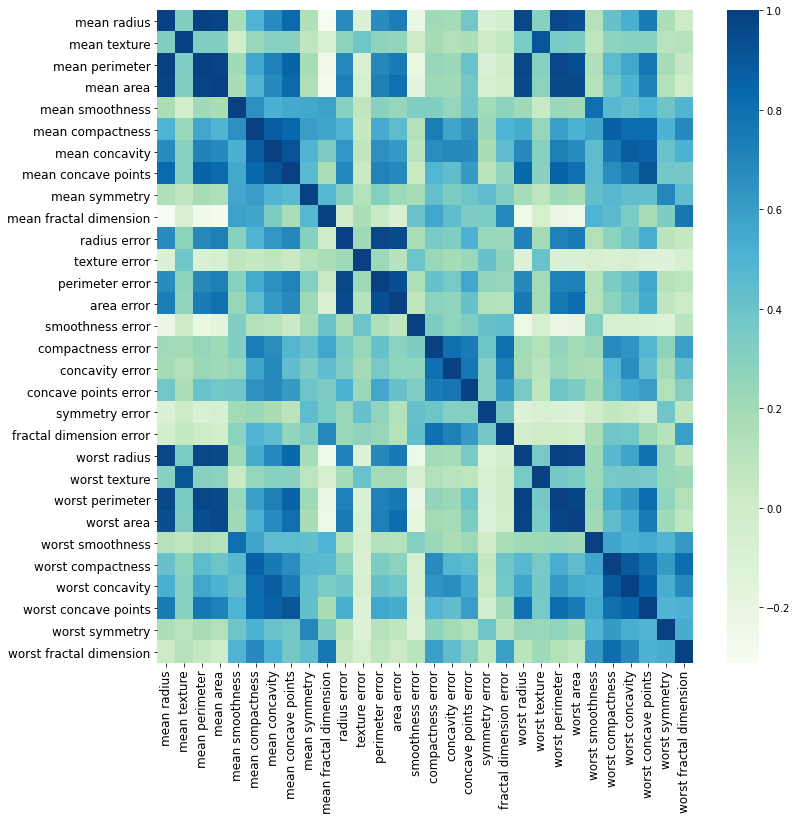

In [5]:
# dataframe으로 만들기
X_df = pd.DataFrame(X, columns=data.feature_names)
# column 별 상관관계
cor = X_df.corr()
plt.figure(figsize=(12,12))
# heatmap
sns.heatmap(cor, cmap='GnBu')
t = plt.xticks(fontsize=12)
t = plt.yticks(fontsize=12)

Text(0.5, 1.0, 'Class countplot')

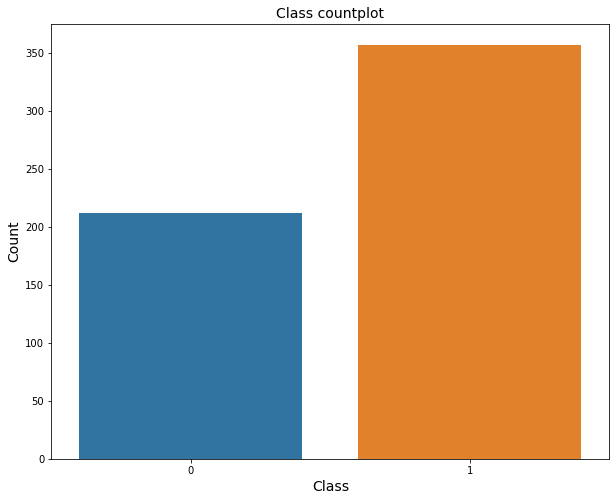

In [6]:
# 타겟
plt.figure(figsize=(10,8))
sns.countplot(y)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title('Class countplot', fontsize=14)

# 모델 학습
* 3가지 데이터셋에서 학습방법이 크게 다르지 않아서 학습과정을 모듈로 만들어서 사용해서 풀이했습니다.

In [7]:
# 분류기 인스턴스
skl = TrainTestSklClassifier(X, y)

In [8]:
# 모델 불러오기
# Decision Tree : DT
# Random Forest : RF
# SVM : SVM
# SGD : SGD
# Logistic Regression : LG
skl.train("RF")

RandomForestClassifier(random_state=123)

In [9]:
# Metric
# accuracy : acc
# classification_report : cr
# f1 score : f1
skl.test("f1")

f1 결과 : 0.972



# 데이터만 바꿔서 반복

## digits

In [10]:
# Data
data = load_digits()
X = data.images
y = data.target

Text(0.5, 0, 'Class')

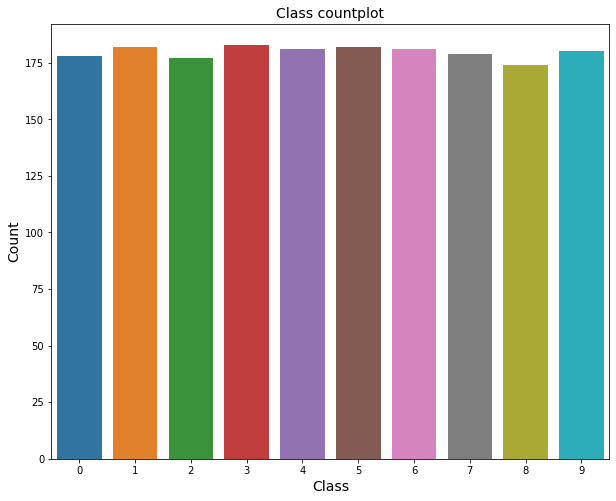

In [11]:
# 시각화
plt.figure(figsize=(10,8))
sns.countplot(y)
plt.title('Class countplot', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Class', fontsize=14)

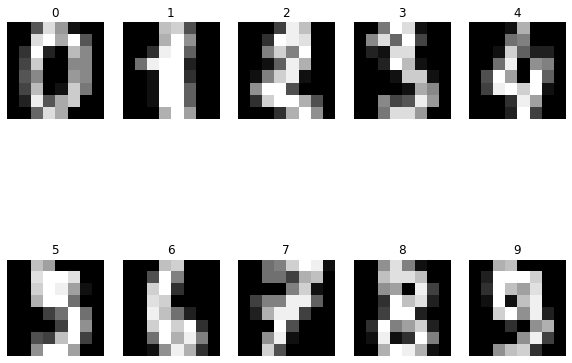

In [12]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
    plt.title('{}'.format(y[i]))
plt.show()

In [13]:
# 모델
skl = TrainTestSklClassifier(X, y)

In [14]:
# 이번엔 DT
skl.train("DT")

DecisionTreeClassifier(random_state=123)

In [15]:
skl.test("cr")

cr 결과 :               precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.82      0.82      0.82        55
           2       0.84      0.91      0.87        53
           3       0.88      0.82      0.85        55
           4       0.90      0.81      0.85        54
           5       0.88      0.93      0.90        55
           6       0.98      0.89      0.93        54
           7       0.85      0.85      0.85        54
           8       0.79      0.81      0.80        52
           9       0.77      0.87      0.82        54

    accuracy                           0.86       540
   macro avg       0.87      0.86      0.87       540
weighted avg       0.87      0.86      0.87       540




## wine

In [17]:
# Data
data = load_wine()
X = data.data
y = data.target

In [18]:
print('Target Names 출력 \n', data.target_names)
print('-' *50)
print('Data Describe \n', data.DESCR)

Target Names 출력 
 ['class_0' 'class_1' 'class_2']
--------------------------------------------------
Data Describe 
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.

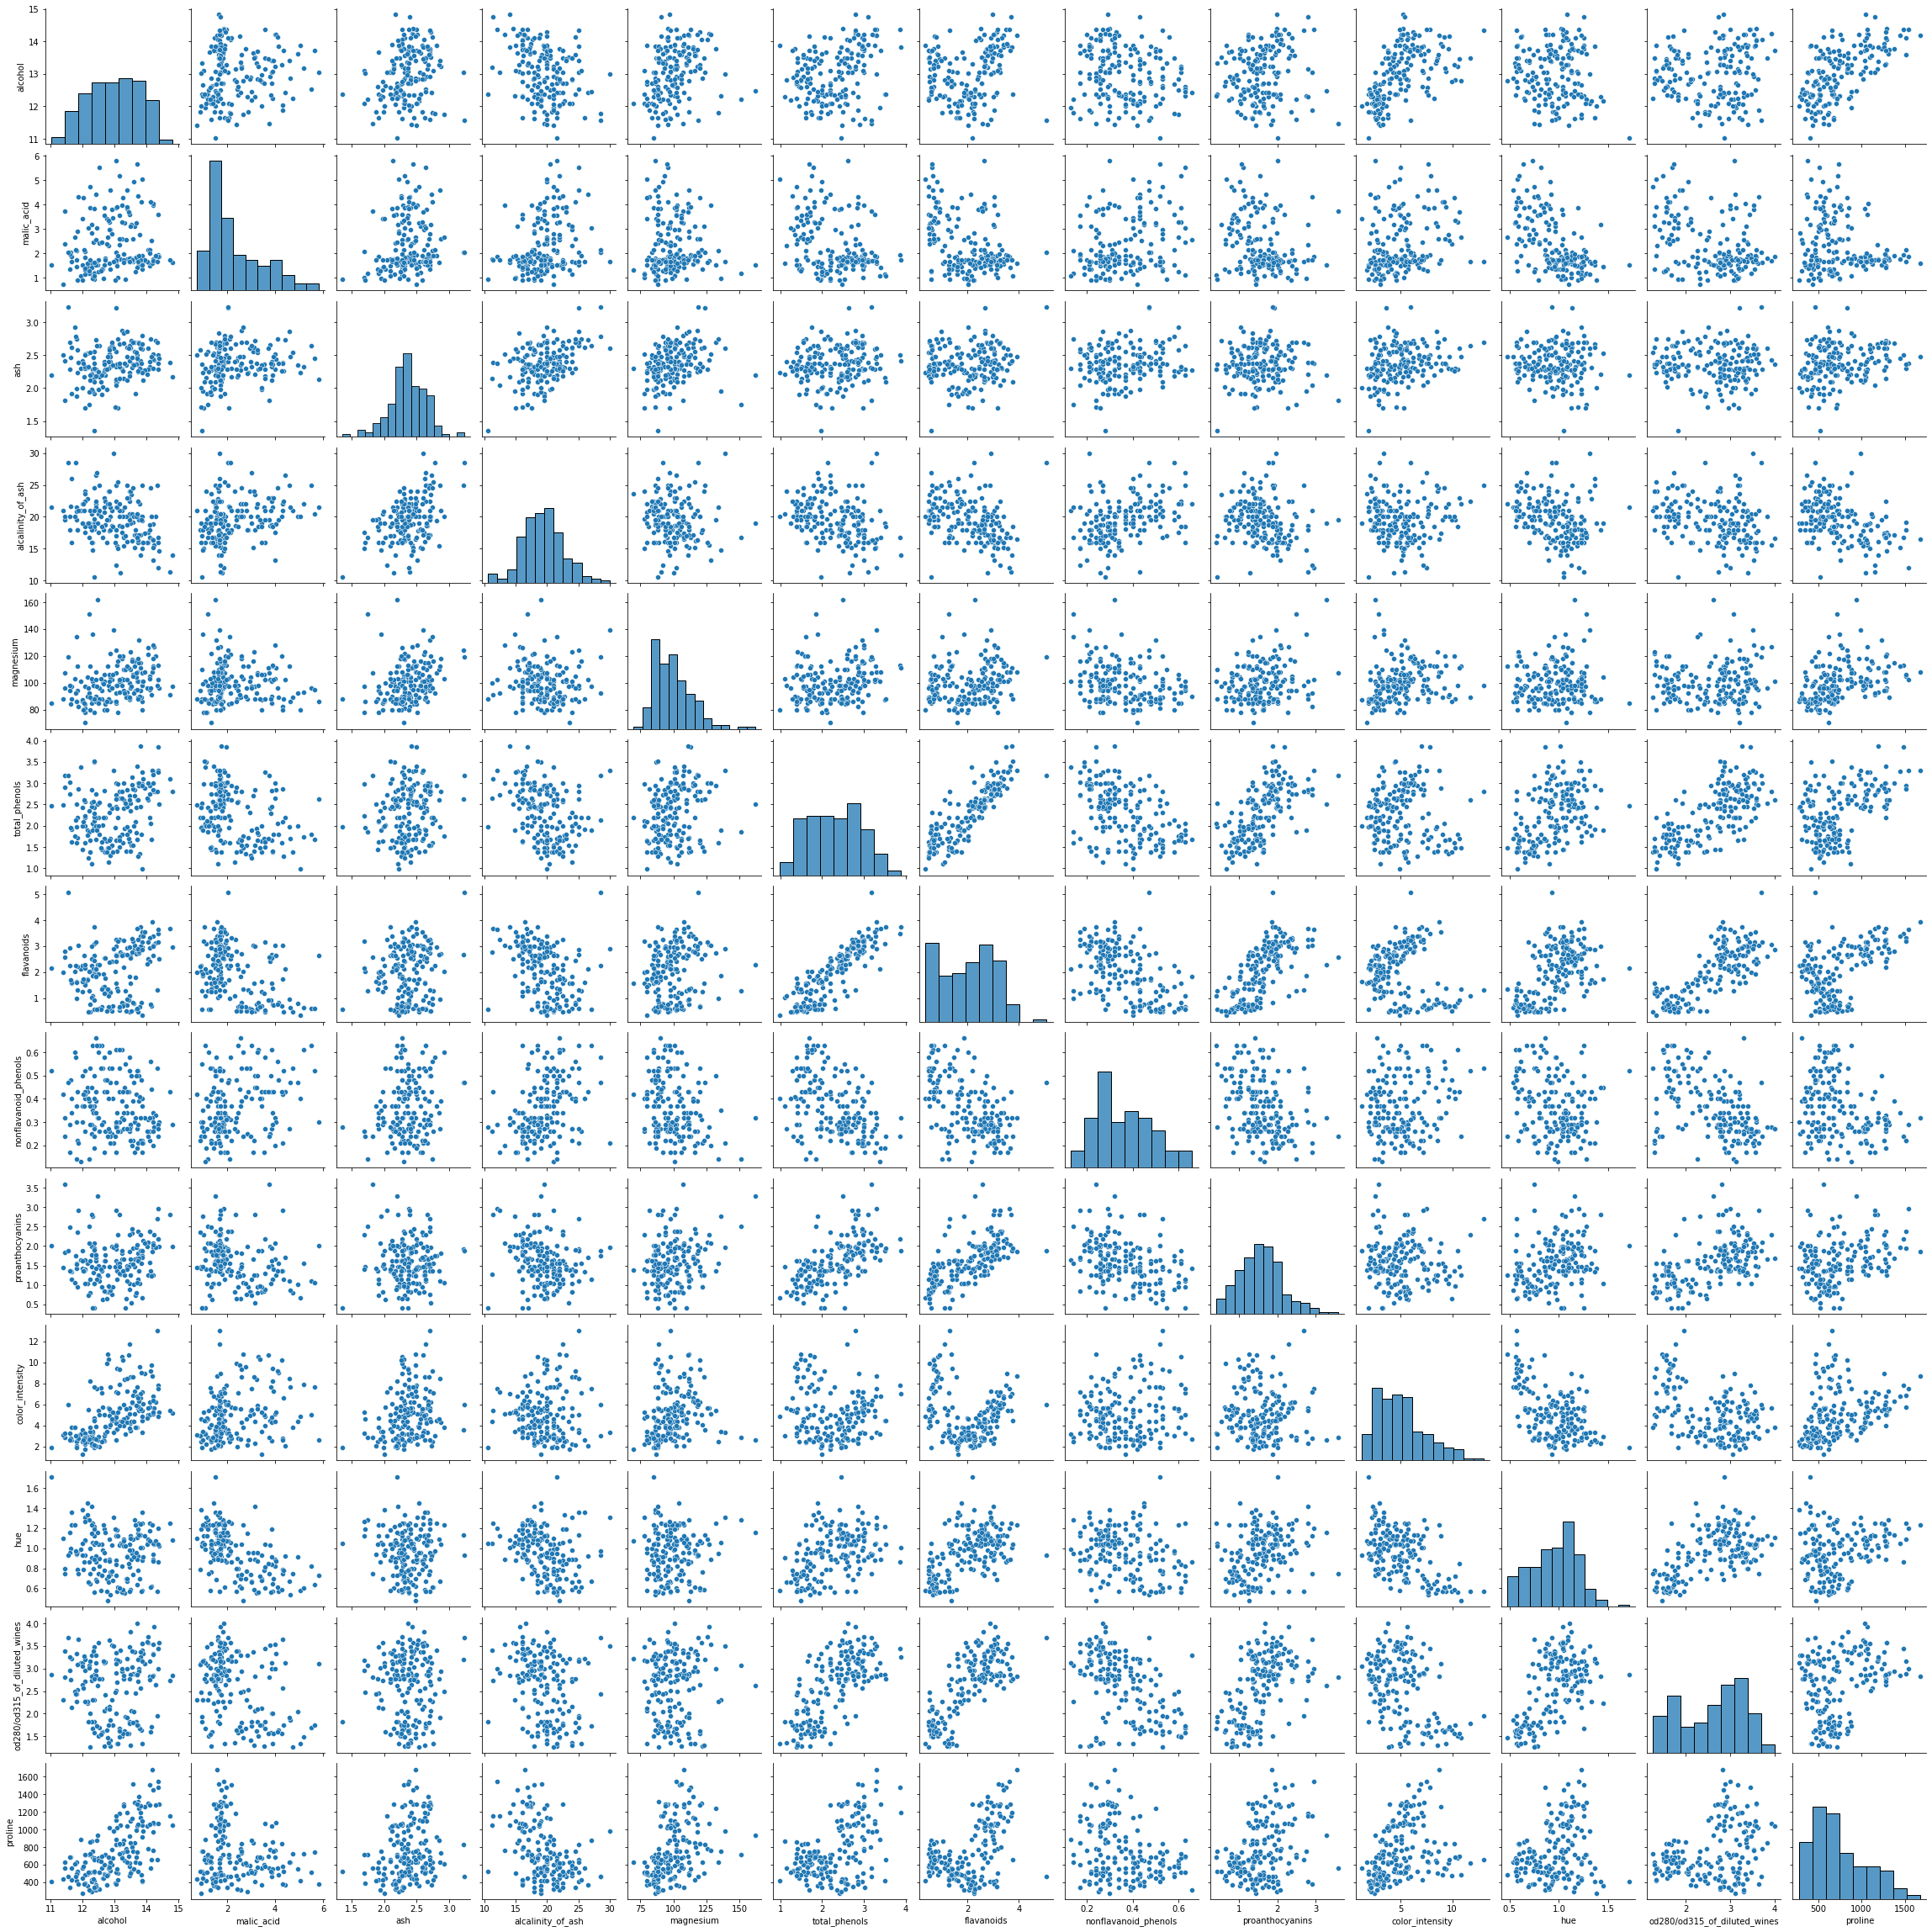

In [20]:
# 시각화
# dataframe만들기
X_df = pd.DataFrame(X, columns=data.feature_names)
# pairplot
# 시간이 좀 걸립니다
sns.pairplot(X_df)

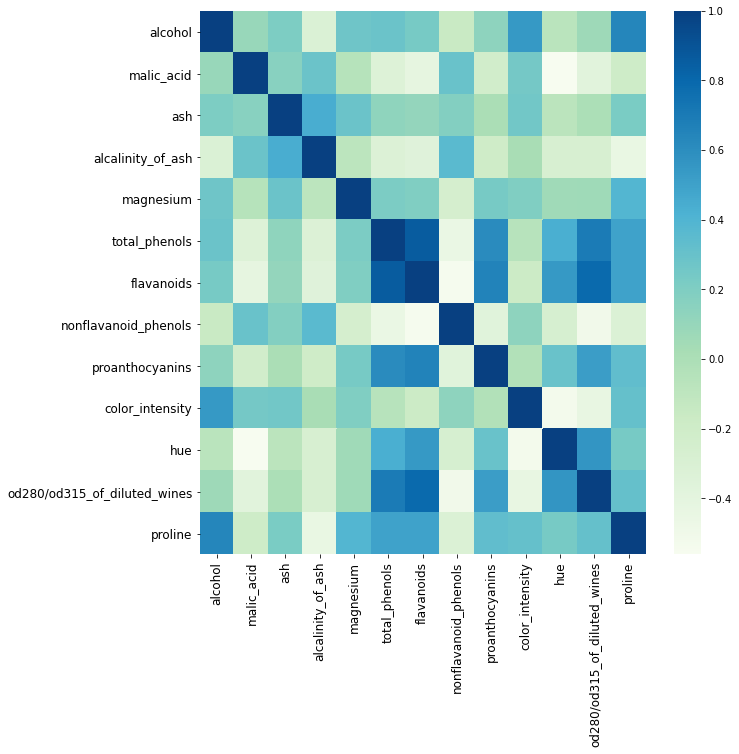

In [21]:
# heatmap
# 상관계수 시각화
# 변수간에 상관관계가 얼마나 존재하는지
cor = X_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap='GnBu')
t = plt.xticks(fontsize=12)
t = plt.yticks(fontsize=12)

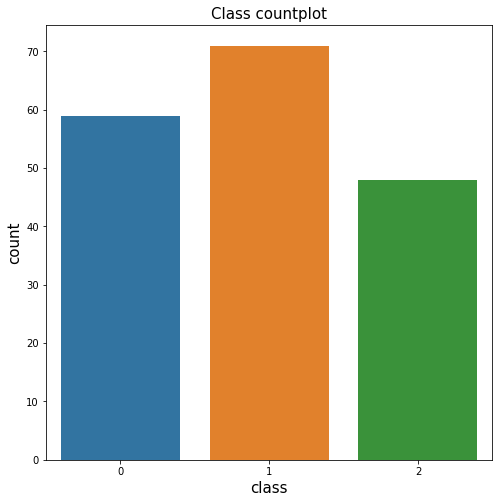

In [22]:
# class 별 카운트
plt.figure(figsize=(8,8))
sns.countplot(y)
t = plt.xlabel('class', fontsize=15)
t = plt.ylabel('count',fontsize=15)
t = plt.title('Class countplot', fontsize=15)

In [23]:
# 모델
skl = TrainTestSklClassifier(X, y)

In [24]:
# 이번엔 SVM
skl.train("SVM")

SVC(random_state=123)

In [25]:
# Metric
skl.test("cr")

cr 결과 :               precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.61      0.95      0.74        21
           2       0.50      0.13      0.21        15

    accuracy                           0.70        54
   macro avg       0.68      0.66      0.62        54
weighted avg       0.69      0.70      0.65        54


